<a href="https://colab.research.google.com/github/Vinh1205/AI/blob/main/4loaihoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

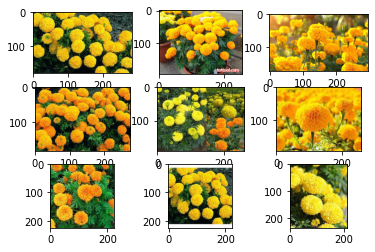

In [9]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Train/HOA/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'vantho.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [10]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Train/HOA/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('vantho'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('cuc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('mattroi'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Hoa_photos.npy', photos)
save('Hoa_labels.npy', labels)

(80, 150, 150, 3) (80,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (150,150,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 4157.6094 - accuracy: 0.2500
Epoch 2/20
3/3 [==============================] - 3s 1s/step - loss: 1162.6707 - accuracy: 0.3000
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 273.5242 - accuracy: 0.2250
Epoch 4/20
3/3 [==============================] - 4s 997ms/step - loss: 84.4848 - accuracy: 0.3375
Epoch 5/20
3/3 [==============================] - 3s 995ms/step - loss: 6.5474 - accuracy: 0.7750
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 5.3525 - accuracy: 0.7875
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 2.1320 - accuracy: 0.8250
Epoch 8/20
3/3 [==============================] - 3s 1s/step - loss: 2.8935 - accuracy: 0.8625
Epoch 9/20
3/3 [==============================] - 3s 990ms/step - loss: 0.2717 - accuracy: 0.9625
Epoch 10/20
3/3 [==============================] - 3s 990ms/step - loss: 0.7995 - accuracy: 0.9000
Epoch 11/20
3/3 [===========

In [13]:
model.evaluate(photos,labels)

3/3 [==============================] - 1s 271ms/step - loss: 0.0038 - accuracy: 1.0000


[0.003806712571531534, 1.0]

In [14]:
model.save('Hoa_Final.h5')

In [15]:
from keras.models import load_model
models=load_model('Hoa_Final.h5')

In [16]:
classes = ["vantho","cuc","mattroi","thuocduoc"]

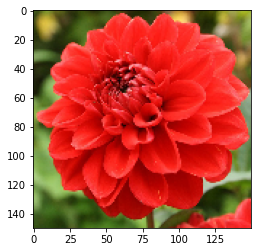

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('duoc.jpg', target_size=(150,150))
plt.imshow(img)

In [30]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.09269292 0.09744059 0.09875723 0.10389909 0.09179248 0.09034166
  0.08220267 0.08051468 0.08897791 0.08987782 0.08350295]]


'thuocduoc'